In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [139]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [140]:
# Data Cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [141]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [142]:
# Renaming Column
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [143]:
# Asign the spam and not spam with value
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['target']=label.fit_transform(df['target'])

In [144]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
#checking null Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   int64 
 1   text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [146]:
# checking Duplicates Value
df.duplicated().sum()

np.int64(403)

In [147]:
# Removing Duplicates value
df=df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [148]:
#EDA part
df['target'].value_counts()

,count
target,
0,4516
1,653


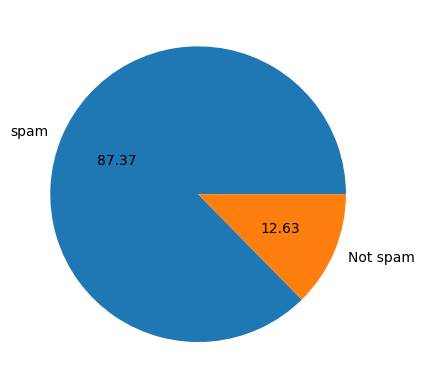

In [149]:
plt.pie(df['target'].value_counts(),labels={'spam','Not spam'},autopct='%0.2f')
plt.show()

In [150]:
# Data is imbalance

In [151]:
import nltk

In [152]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [153]:
df['No_of_char']=df['text'].apply(len)
df

/tmp/ipython-input-1377909597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_char']=df['text'].apply(len)


,target,text,No_of_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [154]:
df['No_of_Word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/tmp/ipython-input-3211862165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_Word']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [155]:
df['No_of_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipython-input-3684228520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [156]:
df.head()

,target,text,No_of_char,No_of_Word,No_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [157]:
df.describe() #for both spam or not_spam

,target,No_of_char,No_of_Word,No_of_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [158]:
#for not_spam
df[df['target']==0].describe()

,target,No_of_char,No_of_Word,No_of_sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [159]:
#for spam
df[df['target']==1].describe()

,target,No_of_char,No_of_Word,No_of_sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='No_of_char', ylabel='Count'>

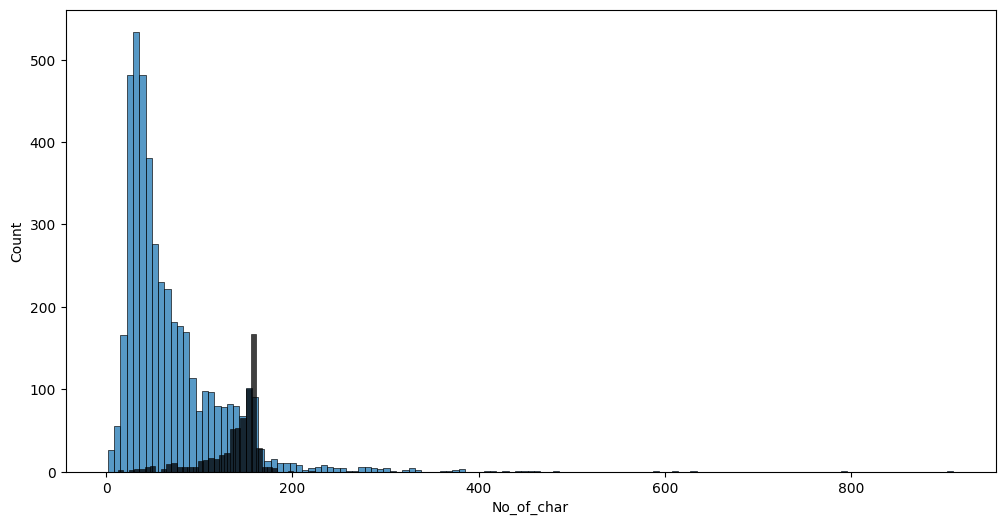

In [160]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['No_of_char'])
sns.histplot(df[df['target']==1]['No_of_char'],color='black')

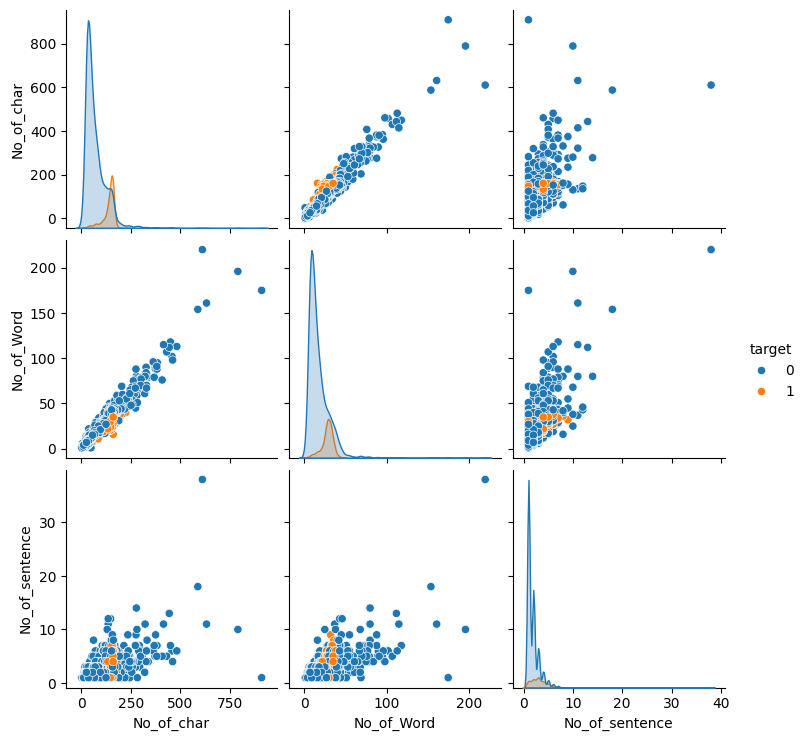

In [161]:
sns.pairplot(df,hue='target')

In [162]:
#Correlation
df.corr(numeric_only=True)[['target','No_of_char','No_of_Word','No_of_sentence']]

,target,No_of_char,No_of_Word,No_of_sentence
target,1.000000,0.384717,0.262912,0.263939
No_of_char,0.384717,1.000000,0.965760,0.624139
No_of_Word,0.262912,0.965760,1.000000,0.679971
No_of_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

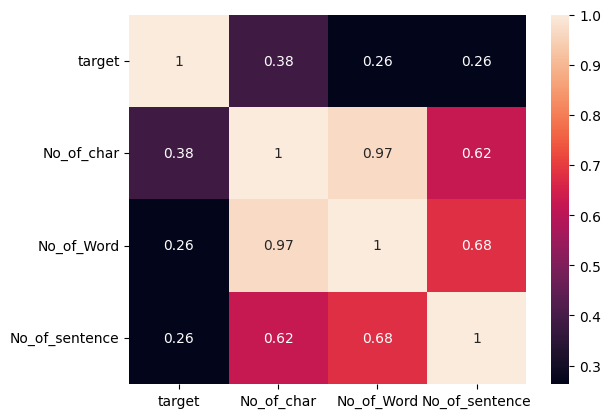

In [163]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [164]:
# Data preprocessing
# Lower Case
# Tokenize
# Removing Special Character
# Removing Stop words and punctuation
# Stemming

In [165]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
nltk.download('stopwords')
nltk.download('punkt')
ps=PorterStemmer()


def Transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  new_value=y[:]
  y.clear()
  for i in new_value:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  new_value=y[:]
  y.clear()
  for i in new_value:
    y.append(ps.stem(i))
  return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [166]:
df['Transform_text']=df['text'].apply(Transform)

/tmp/ipython-input-351200555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transform_text']=df['text'].apply(Transform)


In [167]:
df.head()

,target,text,No_of_char,No_of_Word,No_of_sentence,Transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [168]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='White')

In [169]:
spam_wc=wc.generate(df[df['target']==1]['Transform_text'].str.cat(sep=" "))

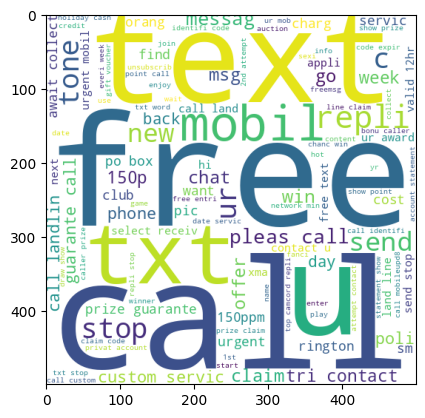

In [170]:
plt.imshow(spam_wc)

In [171]:
not_spam_wc=wc.generate(df[df['target']==0]['Transform_text'].str.cat(sep=" "))

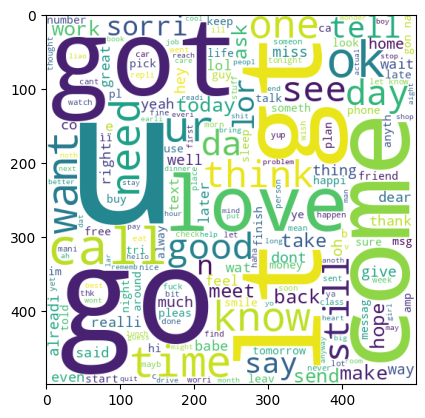

In [172]:
plt.imshow(not_spam_wc)

In [173]:
spam_word=[]
for msg in df[df['target']==1]['Transform_text'].tolist():
  for  word in msg.split():
    spam_word.append(word)

In [174]:
len(spam_word)

9939

In [175]:
not_spam_word=[]
for msg in df[df['target']==0]['Transform_text'].tolist():
  for  word in msg.split():
    not_spam_word.append(word)

In [176]:
len(not_spam_word)

35404

In [177]:
from collections import Counter

In [178]:
x=pd.DataFrame(Counter(spam_word).most_common(30))[0]
y=pd.DataFrame(Counter(spam_word).most_common(30))[1]

 ***MOdel Buliding***

In [179]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [180]:
x=tfidf.fit_transform(df['Transform_text']).toarray()

In [181]:
x.shape

(5169, 3000)

In [182]:
y=df['target'].values

In [183]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=2)

In [184]:
from  sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
ga=GaussianNB()
mb=MultinomialNB()
Bn=BernoulliNB()

In [185]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score
ga.fit(x_train,y_train)
y_pred1=ga.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8846432889963725
[[3275  345]
 [ 132  383]]
0.5260989010989011


In [186]:
mb.fit(x_train,y_train)
y_pred2=mb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9308343409915357
[[3620    0]
 [ 286  229]]
1.0


In [187]:
Bn.fit(x_train,y_train)
y_pred3=Bn.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9429262394195889
[[3614    6]
 [ 230  285]]
0.979381443298969


In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [189]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [190]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [191]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [192]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9608222490931076, 0.9294403892944039)

In [193]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9608222490931076
Precision -  0.9294403892944039
For  KN
Accuracy -  0.8926239419588875
Precision -  1.0
For  NB
Accuracy -  0.9308343409915357
Precision -  1.0
For  DT
Accuracy -  0.9209189842805321
Precision -  0.688
For  LR
Accuracy -  0.9165659008464329
Precision -  0.7972027972027972
For  RF
Accuracy -  0.9516324062877872
Precision -  0.9906542056074766
For  AdaBoost
Accuracy -  0.9129383313180169
Precision -  0.7969348659003831
For  BgC
Accuracy -  0.9422007255139057
Precision -  0.7793522267206477
For  ETC
Accuracy -  0.9603385731559855
Precision -  0.9834710743801653
For  GBDT
Accuracy -  0.9438935912938331
Precision -  0.9327217125382263
For  xgb
Accuracy -  0.950906892382104
Precision -  0.8939393939393939


In [194]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [195]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.892624,1.000000
2,NB,0.930834,1.000000
5,RF,0.951632,0.990654
8,ETC,0.960339,0.983471
9,GBDT,0.943894,0.932722
0,SVC,0.960822,0.929440
10,xgb,0.950907,0.893939
4,LR,0.916566,0.797203
6,AdaBoost,0.912938,0.796935
7,BgC,0.942201,0.779352


In [196]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [197]:
new_df=performance_df.merge(temp_df,on="Algorithm")

In [198]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.892624,1.000000,0.892624,1.000000
1,NB,0.930834,1.000000,0.930834,1.000000
2,RF,0.951632,0.990654,0.951632,0.990654
3,ETC,0.960339,0.983471,0.960339,0.983471
4,GBDT,0.943894,0.932722,0.943894,0.932722
5,SVC,0.960822,0.929440,0.960822,0.929440
6,xgb,0.950907,0.893939,0.950907,0.893939
7,LR,0.916566,0.797203,0.916566,0.797203
8,AdaBoost,0.912938,0.796935,0.912938,0.796935
9,BgC,0.942201,0.779352,0.942201,0.779352


In [199]:
# Voting Classifier
rf = RandomForestClassifier(n_estimators=50, random_state=2)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [200]:
voting = VotingClassifier(estimators=[('rf', rf), ('nb', mnb), ('et', etc)],voting='soft')

In [201]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [202]:
y_predict=voting.predict(x_test)

In [203]:
print('accuracy_score',accuracy_score(y_test,y_predict))
print('precision_score',precision_score(y_test,y_predict))

accuracy_score 0.9506650544135429
precision_score 1.0


In [204]:
pickle.dump(tfidf,open( 'vectorizer.pkl', 'wb'))
pickle.dump(voting,open( 'model.pkl', 'wb'))